In [51]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.integrate as integ

In [52]:
#rk-4 time stepping
#inputs-present solution:yp,present time:tp,f-derivative function,time-step-dt,present time:tp
#returns next timestep tn and next solution yn

def rk4(yp,tp,f,dt):
    
    #rk-4 coefficients
    
    k1=f(yp,tp)
    
    k2=f(yp+dt*(k1/2),tp+(dt/2))
    
    k3=f(yp+dt*(k2/2),tp+(dt/2))
    
    k4=f(yp+dt*k3,tp+dt)
    
    #next time
    
    tn=tp+dt 
    
    #next solution
    
    yn=yp+(dt/6)*(k1+2*k2+2*k3+k4)
    
    return tn,yn
    
    

In [53]:
#a rk-4 solver

#inputs-initial solution y0,step size dt,final time tf,function f

def rk4_solver(y0,dt,tf,f):
    
    #number of derivatives

    N=len(y0)

    #number of time steps
    
    t=np.arange(0,tf,dt)

    Nt=len(t)
    
    #solution initialization
    
    y=np.zeros((Nt,N))

    y[0]=y0

    #time counter

    tp=0 

    #rk4 time stepping

    for i in range(1,Nt):

        #solution at time-step i

        y[i]=rk4(y[i-1],tp,f,dt)[1]

        #updating time

        tp=rk4(y[i-1],tp,f,dt)[0]

    return y


    

In [43]:
#numerical solution

tf=2*np.pi

#rhs function

def f(y0,tp):
    return np.array([y0[1],-y0[0]])

#initial y0

y0=[1,0]

def numerical_solution_error(dt):

    numerical_solution=rk4_solver(y0,dt,tf,f)[0:,:1] #first column of solution

    #number of time points

    t=np.arange(0,tf,dt)

    Nt=len(t)

    #reshaped numerical solution

    numerical_solution=numerical_solution.reshape(Nt)

    #exact solution

    exact_solution=np.cos(t)

    #error 

    error=np.max(np.abs(numerical_solution-exact_solution))

    return error



In [54]:
#numerical error for standard library function

def library_error(dt):

    #number of time points

    t=np.arange(0,tf,dt)

    Nt=len(t)


    numerical_solution=integ.odeint(f,y0,t)[0:,:1] #first column of solution

    
    #reshaped numerical solution

    numerical_solution=numerical_solution.reshape(Nt)

    #exact solution

    exact_solution=np.cos(t)

    #error 

    error=np.max(np.abs(numerical_solution-exact_solution))

    return error

In [59]:
#checking my code accuracy

dt=0.001

print(numerical_solution_error(dt))

4.18554080283684e-14


In [60]:
#checking library code accuracy

dt=0.001

print(library_error(dt))

6.183776390944473e-08


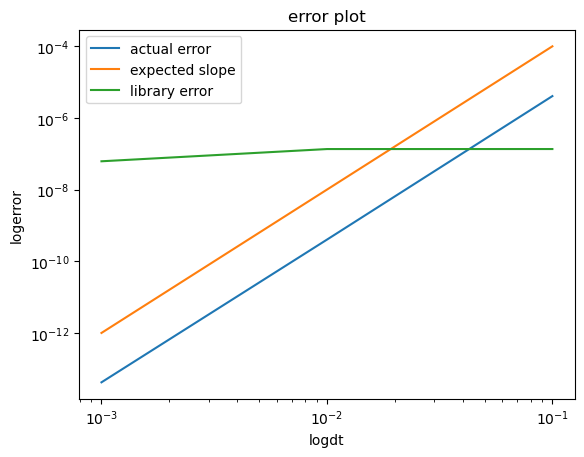

In [56]:
#plotting error vs array dt_array

def error_plot(dt_array):

    vmy=np.vectorize(numerical_solution_error)

    vlib=np.vectorize(library_error)

    myerror=vmy(dt_array) #error of my rk-4 code

    liberror=vlib(dt_array) #error from library function

    #plotting my code error

    plt.loglog(dt_array,myerror,label='actual error')

    #plotting the expected rk-4 slope

    plt.loglog(dt_array,dt_array**4,label='expected slope')
    
    #plotting library code error

    plt.loglog(dt_array,liberror,label='library error')

    plt.legend()
    plt.xlabel('logdt')
    plt.ylabel('logerror')
    plt.title('error plot')

dt_array=np.array([0.1,0.01,0.001])

error_plot(dt_array)



    

In [ ]:


#the odeint doesnt feel like rk4 method 

#couldnt find a rk4 method which depends on stepsize .checked rk45 but the step size is chosemn by solver